First Row of the Dataset:
  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
Mean Squared Error: 9.225663641190895
R2 Score: 0.5995038184047499


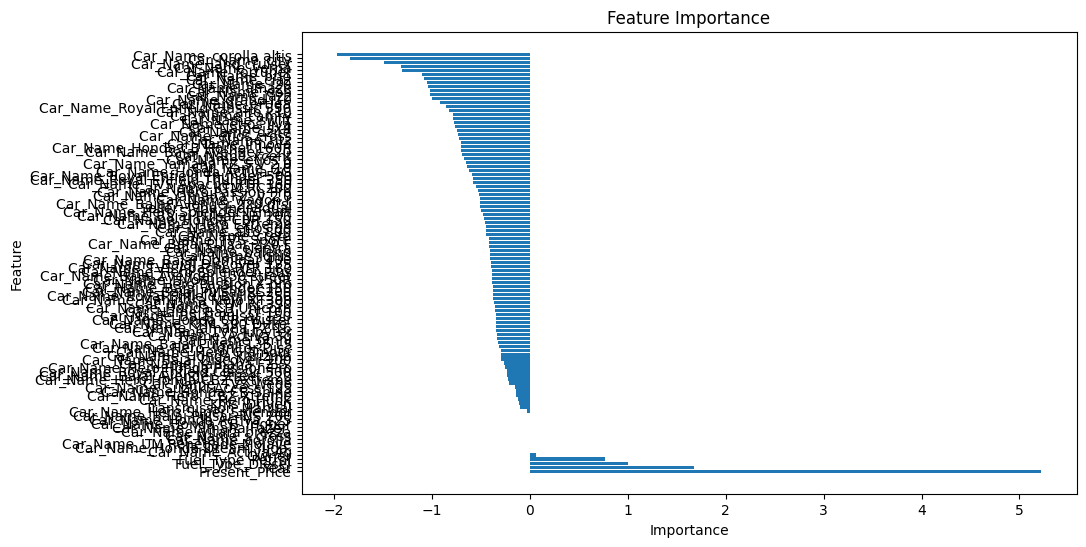

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv('car_data.csv')

print("First Row of the Dataset:")
print(data.head(1))

numeric_cols = data.select_dtypes(include=[np.number]).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

categorical_cols = data.select_dtypes(exclude=[np.number]).columns
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

data = pd.get_dummies(data, drop_first=True)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop('Selling_Price', axis=1))

X = scaled_data
y = data['Selling_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

coefficients = model.coef_
features = data.drop('Selling_Price', axis=1).columns
feature_importance = pd.DataFrame({'Feature': features, 'Importance': coefficients})

feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()